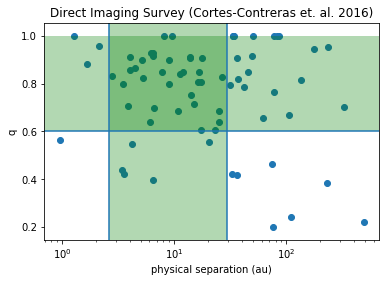

In [1]:
# Importing / setting up direct imaging (DI) data
import numpy as np
import matplotlib.pyplot as plt
dist_DI, angle_DI, m1_DI, m2_DI, spt_DI = np.genfromtxt('DI_data.txt', skip_header = 1, delimiter = ',', unpack = True, dtype=(float), usecols = (3, 4, 5, 6, 7))

# calculating separation - by definition of parsec, separation = angular size * parsec
sep_DI = dist_DI * angle_DI

q_DI = np.zeros(70)
q_DI = np.divide(m2_DI, m1_DI)

plt.scatter(sep_DI, q_DI)
plt.ylabel("q")
plt.xlabel("physical separation (au)")
plt.xscale('log')
# plt.axhline(y=.3) # spt < 3.5
plt.axhline(y=.6) # spt > 3.5
plt.axvline(x=2.6)
plt.axvline(x=29.5)
plt.axvspan(2.6, 29.5, facecolor='g', alpha=.3)
plt.axhspan(.6, 1, facecolor='g', alpha=0.3)
plt.title("Direct Imaging Survey (Cortes-Contreras et. al. 2016)")
plt.show()

43


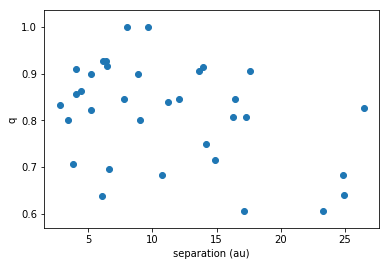

In [2]:
# finding index of values of sep beyond completeness limit
sorted_sep_DI = np.sort(sep_DI)
for pos, val in enumerate(sorted_sep_DI):
    if val > 2.6:
        complete_pos_sep = pos # = 4
#         print(complete_pos_sep)
        break 
for pos, val in enumerate(sorted_sep_DI):
    if val > 29.5:
        complete_pos_sep = pos # = 43
        print(complete_pos_sep)
        break  
        
# places associated q and s values together in one 2 row array
# DI_data[0] = sep, [1] = q
DI_data = np.stack((sep_DI, q_DI, spt_DI))

# accounting for sep completion
# sorts array of values by ascending sep, keeps associated values together
a1 = DI_data[0,:].argsort() 
DI_data_sorted = DI_data[:,a1]

# splicing off values beyond completeness limit using index found above, therefore accounting for completeness
DI_data_complete1 = np.array([DI_data_sorted[i][4:43] for i in range(0,3)])

# accounting for q completion
# sorts array of values by ascending q, keeps associated values together
a2 = DI_data_complete1[1,:].argsort() 
DI_data_sorted2 = DI_data_complete1[:,a2]

# finding index of values of q beyond completeness limit
sorted_q_DI = np.sort(DI_data_sorted2[1])
for pos, val in enumerate(sorted_q_DI):
    if val > .6:
        complete_pos_DI = pos # = 13
#         print(complete_pos_DI)
        break

# splicing off values beyond completeness limit using index found above, therefore accounting for completeness
DI_data_complete = np.array([DI_data_sorted2[i][5:] for i in range(0,3)])

# print(DI_data_complete)

plt.scatter(DI_data_complete[0],DI_data_complete[1])
plt.ylabel("q")
plt.xlabel("separation (au)")
plt.show()

[0.028733814982608876 0.7976326909574777 0.04658442059739402
 0.22087331158006182 0.04475480868014641 0.036294678201237336]
4.639037510000115


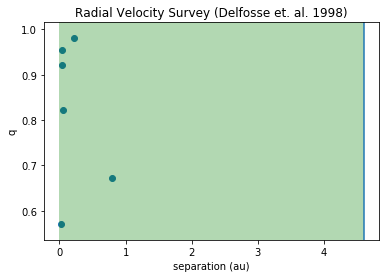

In [3]:
P_RV_days, e_RV, w_RV, k1_RV, k2_RV, v0_RV, m1_RV, m2_RV,sep_RV = np.loadtxt('RV_data.txt', skiprows = 2, delimiter = ',', unpack = True)

G = 6.67 * 10**-11 # m**3 kg**-1 s**-2
pi = 3.14159265359

# unit conversion
P_RV_secs = P_RV_days * 86400 # days to seconds
m1_RV_kg = m1_RV * 2*10**30 # Msun to kg
m2_RV_kg = m2_RV * 2*10**30 # Msun to kg

# separation calculation - sep = ((P**2G(m1+m2))/2pi**2)**(1/3)
sep_RV_m = ((((P_RV_secs**2)*G*(m1_RV_kg+m2_RV_kg))/(4*pi**2))**(1/3))
sep_RV = sep_RV_m * 6.685*10**-12
print(sep_RV)

# separation detection limit calculation - sensitive to periods < 20 years and negligible companion mass, using mean mass of primaries and P = 20 years
mean_mass_msun = sum(m1_RV) / len(m1_RV)
mean_mass_kg = mean_mass_msun * 2*10**30
period_limit = 6.307 * 10**8 # 20 years in seconds
sep_complete_m = ((((period_limit**2)*G*mean_mass_kg)/(4*pi**2))**(1/3))
sep_complete_au = sep_complete_m * 6.68459*10**-12 # m to au
print(sep_complete_au) # = 4.6


q_RV = np.divide(m2_RV,m1_RV)

plt.scatter(sep_RV, q_RV)
plt.ylabel("q")
plt.xlabel("separation (au)")
plt.axvline(x=4.6)
plt.axvspan(0, 4.6, facecolor='g', alpha=.3)
plt.title("Radial Velocity Survey (Delfosse et. al. 1998)")
plt.show()

RV_data = np.stack((sep_RV,q_RV))

1


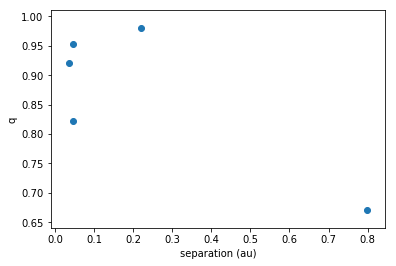

[[0.028733814982608876 0.7976326909574777 0.04658442059739402
  0.22087331158006182 0.04475480868014641 0.036294678201237336]
 [0.5714285714285714 0.6712643678160919 0.821705426356589 0.979757085020243
  0.9535864978902955 0.9209302325581395]]
[[0.7976326909574777 0.04658442059739402 0.036294678201237336
  0.04475480868014641 0.22087331158006182]
 [0.6712643678160919 0.821705426356589 0.9209302325581395
  0.9535864978902955 0.979757085020243]]


In [4]:
sorted_q_RV = np.sort(q_RV)
for pos, val in enumerate(sorted_q_RV):
    if val > .6:
        complete_pos_q = pos # = 1
        print(complete_pos_q)
        break 

# accounting for sep completion
# sorts array of values by ascending sep, keeps associated values together
a2 = RV_data[1,:].argsort() 
RV_data_sorted = RV_data[:,a2]

# splicing off values beyond completeness limit using index found above, therefore accounting for completeness
RV_data_complete = np.array([RV_data_sorted[i][1:] for i in range(0,2)])

plt.scatter(RV_data_complete[0], RV_data_complete[1])
plt.ylabel("q")
plt.xlabel("separation (au)")

plt.show()

print(RV_data)
print(RV_data_complete)

In [5]:
from scipy import stats as sci
print(sci.ks_2samp(DI_data_complete[1],RV_data_complete[1]))
# p is large - accept the null hypothesis that two samples are drawn from same distribution

Ks_2sampResult(statistic=0.48235294117647054, pvalue=0.18536640504452792)


In [8]:
# observed separations within completion
a_min_DI = 2.7642
a_max_DI = 26.46
a_min_RV = .0363
a_max_RV = .7976

# # complete separations
# a_min_DI = 2.6
# a_max_DI = 29.5
# a_min_RV = .01
# a_max_RV = 4.6

parent_DI = 490
parent_RV = 115
companions_DI = DI_data_complete[1].size # q > .6
companions_RV = RV_data_complete[1].size # q > .6
f_DI = companions_DI / parent_DI
f_RV = companions_RV / parent_RV

print("f_DI = ", f_DI,"f_RV = ", f_RV)

f_DI =  0.06938775510204082 f_RV =  0.043478260869565216


In [23]:
import scipy.integrate as integrate
from math import log10, gamma

e = 2.71828
# f_DI = .069
# f_RV = .043
# A = np.arange(.1,1,.001)
# lam = np.arange(.954,1.041,.001)
# N_DI = 0
# N_RV = 0

# i = 0
# while f_DI != N_DI and f_RV != N_RV:
#     N_DI = A[i] * integrate.quad(lambda x: ((lam[i]**x)*e**(-lam[i])) / gamma(x + 1), log10(a_min_DI),log10(a_max_DI))
#     N_RV = A[i] * integrate.quad(lambda x: ((lam[i]**x)*e**(-lam[i])) / gamma(x + 1), log10(a_min_RV),log10(a_max_RV))
#     i += 1
#     if i == len(A) - 1 or i == len(lam) -1:
#         print("shit")
#         break

# lam = log10(10)
# int_DI = integrate.quad(lambda x: ((lam**x)*e**(-lam)) / gamma(x + 1), log10(a_min_DI),log10(a_max_DI))
# int_RV = integrate.quad(lambda x: ((lam**x)*e**(-lam)) / gamma(x + 1), log10(a_min_RV),log10(a_max_RV))
# N_DI_init = int_DI[0]
# N_RV_init = int_RV[0]
# print("N_DI =",N_DI, "N_RV= ",N_RV)

# while f_DI != N_DI and f_RV != N_RV:
#     f_DI = A[i] * N_DI
#     f_RV = A[i] * N_RV
#     i += 1
#     if i == len(A) - 1 or i == len(lam) - 1:
#         print("shit")
#         break
        
# for i in range(len(A)):
#     if f_DI != N_DI and f_RV != N_RV:
#         N_DI = f_DI / A[i]
#         N_RV = f_RV / A[i]

# print(i)
# print(A[i], N_DI, f_DI, N_RV, f_RV)




for i in np.arange(log10(2),log10(20),.000001):
    lam = i
    int_DI = integrate.quad(lambda x: ((lam**x)*e**(-lam)) / gamma(x + 1), log10(a_min_DI),log10(a_max_DI))
    int_RV = integrate.quad(lambda x: ((lam**x)*e**(-lam)) / gamma(x + 1), log10(a_min_RV),log10(a_max_RV))
    N_DI = int_DI[0]
    N_RV = int_RV[0]
    A12 = f_RV / N_RV
    A34 = f_DI / N_RV
    if A12 == A34:
        print(A12,A34,lam)

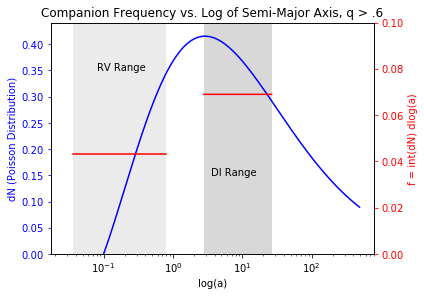

In [26]:


lam = 1 # AU, average semi-major axis from Meyer 
x = []
x_range = []
pois = []

for i in np.arange(.028,489.09,.01):
    x = log10(i)
    pois.append(((lam**x)*e**(-lam)) / gamma(x + 1))
    x_range.append(i)

fig, ax1 = plt.subplots()
ax1.plot(x_range, pois, 'b-')
ax1.set_xlabel('log(a)')
ax1.set_ylabel('dN (Poisson Distribution)', color='b')
ax1.tick_params('y', colors='b')
# ax1.axvline(a_min_DI)
# ax1.axvline(a_max_DI)
# ax1.axvline(a_min_RV)
# ax1.axvline(a_max_RV)
ax1.axvspan(a_min_DI, a_max_DI, facecolor='grey', alpha=.3)
ax1.axvspan(a_min_RV, a_max_RV, facecolor='silver', alpha=.3)
ax1.set_ylim(0)
ax1.annotate('RV Range', xy=(.08, .35))
ax1.annotate('DI Range', xy=(3.5, .15))

ax2 = ax1.twinx()
# ax2.scatter(9.5,.069, c = 'red') # f_DI_data
# ax2.scatter(.128,.043, c = 'red') # f_RV_data
# ax2.errorbar(9.5, .069, xerr=5,color = 'red')
# ax2.errorbar(.128, .043, xerr=.03,color = 'red')
ax2.set_ylabel('f = int(dN) dlog(a)', color='r')
DI_domain = []
DI_range = np.arange(a_min_DI,a_max_DI,.01)
for i in range(len(DI_range)):
    DI_domain.append(f_DI)
RV_domain = []
RV_range = np.arange(a_min_RV,a_max_RV,.01)
for i in range(len(RV_range)):
    RV_domain.append(f_RV)
ax2.plot(DI_range,DI_domain, c="red")
ax2.plot(RV_range,RV_domain, c="red")
ax2.tick_params('y', colors='r')
ax2.set_ylim(0,.1)

fig.tight_layout()
plt.xscale('log')
plt.title("Companion Frequency vs. Log of Semi-Major Axis, q > .6")
plt.show()